In [1]:
import numpy as np
import pandas as pd
import math
import pylab

np.random.seed(0)

In [100]:
N = 100 # ニューロン数

### 重みの設定 ###
G = 0.4 # 大きくするとカオスを優先
Q = 1.2 # 大きくすると学習を優先
p = 0.1 # 重みをスパースに

ita = (2*np.random.rand(N) - 1) # -1から1のランダムな値
omega = G*(np.random.randn(N,N))*(np.random.rand(N,N) < p) / (math.sqrt(N)*p) # 重みの初期値はランダム
phi = np.zeros(N) # 学習する重み

# 各ニューロンの重みの平均を明示的に0に
for i in range(N):
    non_zero = omega[i]!=0
    omega[i,non_zero] -= np.mean(omega[i,non_zero])

# 重み更新のための変数たち
lam = 0.99    # 正則化のための定数λ。1に近いけど1より小さい正の値
P = np.eye(N) / lam

reservoir_node = np.random.uniform(0, 1, N)

### sin波形の生成 ###
T = 5000 # シミュレーション時間
T_start = 1000 # 訓練開始時刻
T_end = 3000 # 訓練終了時刻
step = 10 # 重みを更新する時間間隔
sine_period = 400 # 波形の周期

signal = np.sin(2*math.pi*np.arange(T)/sine_period) # sin波形

predict_record = np.zeros(T) # 重みの記録用


In [101]:
for t in range(T):
    predict = np.dot(phi,reservoir_node) # 予測
    error = predict - signal[t] # 誤差の計算
    print("Time: {}, Error: {}, Predict: {}, Real Value: {}".format(t, error, predict, signal[t]))
    # print(reservoir_node)
    
    if(t >= T_start and t < T_end):
        # 重みの更新
        g = (P @ reservoir_node) / (lam + reservoir_node @ P @ reservoir_node)
        d_phi = - error * g
        phi = phi + d_phi
        P = (P - g.reshape(N,1) @ reservoir_node.reshape(1,N) @ P) / lam
    
        omega = omega + Q * ita.reshape(N,1) @ d_phi.reshape(1,N)

    reservoir_node = np.dot(omega, reservoir_node)
    
    # 普通にやると値が発散してしまったので、活性化関数に通すことで範囲を[-1,1]に抑える
    reservoir_node = np.tanh(reservoir_node)
    
    predict_record[t] = predict # 結合重みを記録



Time: 0, Error: 0.0, Predict: 0.0, Real Value: 0.0
Time: 1, Error: -0.015707317311820675, Predict: 0.0, Real Value: 0.015707317311820675
Time: 2, Error: -0.03141075907812829, Predict: 0.0, Real Value: 0.03141075907812829
Time: 3, Error: -0.04710645070964266, Predict: 0.0, Real Value: 0.04710645070964266
Time: 4, Error: -0.06279051952931337, Predict: 0.0, Real Value: 0.06279051952931337
Time: 5, Error: -0.07845909572784494, Predict: 0.0, Real Value: 0.07845909572784494
Time: 6, Error: -0.09410831331851431, Predict: 0.0, Real Value: 0.09410831331851431
Time: 7, Error: -0.10973431109104527, Predict: 0.0, Real Value: 0.10973431109104527
Time: 8, Error: -0.12533323356430426, Predict: 0.0, Real Value: 0.12533323356430426
Time: 9, Error: -0.14090123193758267, Predict: 0.0, Real Value: 0.14090123193758267
Time: 10, Error: -0.15643446504023087, Predict: 0.0, Real Value: 0.15643446504023087
Time: 11, Error: -0.17192910027940952, Predict: 0.0, Real Value: 0.17192910027940952
Time: 12, Error: -0.1

Time: 1431, Error: -0.005393181580101325, Predict: -0.47332299584067383, Real Value: -0.4679298142605725
Time: 1432, Error: 0.004473309782866697, Predict: -0.47728036431884846, Real Value: -0.48175367410171516
Time: 1433, Error: 0.010890765597727226, Predict: -0.48456790283467777, Real Value: -0.495458668432405
Time: 1434, Error: 0.013364190356089378, Predict: -0.49567722539428005, Real Value: -0.5090414157503694
Time: 1435, Error: 0.014245683812967758, Predict: -0.508252880902983, Real Value: -0.5224985647159508
Time: 1436, Error: 0.01497650666560657, Predict: -0.5208502883133866, Real Value: -0.5358267949789932
Time: 1437, Error: 0.01681211717477371, Predict: -0.5322107008233583, Real Value: -0.549022817998132
Time: 1438, Error: 0.020225407403178464, Predict: -0.541857970448953, Real Value: -0.5620833778521315
Time: 1439, Error: 0.02376138331936939, Predict: -0.5512438687239078, Real Value: -0.5750052520432772
Time: 1440, Error: 0.026241157066876575, Predict: -0.5615440952255959, Rea

Time: 2269, Error: 5.204657271951074e-05, Predict: -0.8837135835159742, Real Value: -0.8837656300886937
Time: 2270, Error: 8.597655244468871e-05, Predict: -0.8909205476359205, Real Value: -0.8910065241883652
Time: 2271, Error: 0.00010252663844134702, Predict: -0.8979250491221752, Real Value: -0.8980275757606165
Time: 2272, Error: 0.00010456884593390559, Predict: -0.9047224836200869, Real Value: -0.9048270524660208
Time: 2273, Error: 0.00010136461867982227, Predict: -0.911301912016764, Real Value: -0.9114032766354438
Time: 2274, Error: 0.00010192716133650137, Predict: -0.9176526985226436, Real Value: -0.9177546256839801
Time: 2275, Error: 0.00010967660401539625, Predict: -0.9237698559072707, Real Value: -0.9238795325112861
Time: 2276, Error: 0.00012101336302816623, Predict: -0.9296554725252228, Real Value: -0.929776485888251
Time: 2277, Error: 0.00012813609228667922, Predict: -0.9353158947375806, Real Value: -0.9354440308298673
Time: 2278, Error: 0.00012357781966054748, Predict: -0.9407

Time: 3093, Error: -0.0001643032407873113, Predict: -0.9941252586959668, Real Value: -0.9939609554551795
Time: 3094, Error: -0.0001573785991056953, Predict: -0.9957193432021856, Real Value: -0.9955619646030799
Time: 3095, Error: -0.0001453274732935439, Predict: -0.9970626612064215, Real Value: -0.996917333733128
Time: 3096, Error: -0.0001285538761508498, Predict: -0.9981552823044224, Real Value: -0.9980267284282716
Time: 3097, Error: -0.0001076525944069262, Predict: -0.9989975275563766, Real Value: -0.9988898749619697
Time: 3098, Error: -8.338142424169082e-05, Predict: -0.9995899417899731, Real Value: -0.9995065603657314
Time: 3099, Error: -5.6630500182675014e-05, Predict: -0.9999332629818432, Real Value: -0.9998766324816605
Time: 3100, Error: -2.8376107999328326e-05, Predict: -1.0000283761079993, Real Value: -1.0
Time: 3101, Error: 3.668777760479358e-07, Predict: -0.9998762656038847, Real Value: -0.9998766324816607
Time: 3102, Error: 2.858957439755283e-05, Predict: -0.9994779707913338

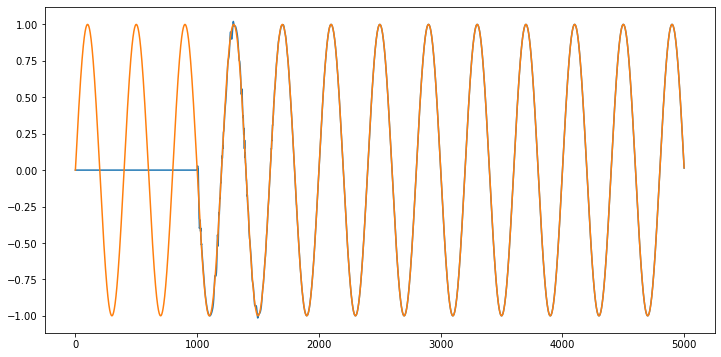

In [102]:
pylab.figure(figsize=(12,6))
pylab.plot(predict_record)   # 予測
pylab.plot(signal)           # 正解の波形

In [96]:
phi

array([-1.23914554,  0.08918943,  0.49558558,  0.59505465,  0.86647983,
        0.04806046, -0.15991033, -0.3380909 ,  0.37390232, -0.34407903,
       -0.15655231, -0.76969327, -0.0927859 , -0.40133617, -0.41889262,
       -0.24146626,  0.48901531, -0.05383268, -0.48241442, -0.66327948,
       -0.2569591 , -0.45668666, -0.12803633, -0.13080783, -0.06605348,
        0.02648727, -0.30735057,  0.38132031,  0.19315878,  0.01063222,
       -0.73117958,  0.56231484, -0.22009344, -0.3281589 ,  0.27954644,
       -0.41667235, -0.10898602,  0.12366295, -0.33655628,  0.30890815,
        0.59057306, -0.59065884,  0.35279444, -0.5542044 ,  0.51588538,
       -0.03318145,  0.32204505, -0.19266442,  0.04306532, -0.33048503,
        0.82740626, -0.50454582,  0.44790389, -0.02726849, -0.77098329,
        0.06000677,  0.2543846 ,  0.13056399,  0.46944644,  0.04099629,
        1.18628261, -0.72911071, -0.33180027,  0.46670002, -0.32104222,
       -0.0650943 ,  0.04928789, -0.05916489,  0.05693569,  0.01